In [38]:
! pip install --upgrade pandas tensorflow_gpu ktrain

Requirement already up-to-date: pandas in /usr/local/lib/python3.6/dist-packages (1.0.3)
     |████████████████████████████████| 421.8MB 26kB/s 
Requirement already up-to-date: ktrain in /usr/local/lib/python3.6/dist-packages (0.14.2)


In [0]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [2]:
! rm -rf apex
! git clone https://www.github.com/nvidia/apex
! cd apex && python setup.py install

Cloning into 'apex'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6593 (delta 0), reused 2 (delta 0), pack-reused 6589
Receiving objects: 100% (6593/6593), 13.71 MiB | 13.53 MiB/s, done.
Resolving deltas: 100% (4382/4382), done.
torch.__version__  =  1.4.0
setup.py:46: UserWarning: Option --pyprof not specified. Not installing PyProf dependencies!
  warnings.warn("Option --pyprof not specified. Not installing PyProf dependencies!")
running install
running bdist_egg
running egg_info
creating apex.egg-info
writing apex.egg-info/PKG-INFO
writing dependency_links to apex.egg-info/dependency_links.txt
writing top-level names to apex.egg-info/top_level.txt
writing manifest file 'apex.egg-info/SOURCES.txt'
writing manifest file 'apex.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build

In [0]:
! cp ./drive/My\ Drive/mlin/hindicorpus/hi_3500.csv ./

In [1]:
import pandas as pd 

df = pd.read_csv("./hi_3500.csv", header=0, names=['review', 'sentiment'])
print(df.head())

                                              review sentiment
0  गुमनाम है वतन पर मिटने वाले लोग आतन्कवादियों स...  negative
1  ज़ंजीर बदली जा रही थी मैं समझा था रिहाई हो गयी है  negative
2  यूपी में बड़े स्तर पर दंगे करवा सकती है बीजेपी...  negative
3  अंग्रेजी नहीं आती है इसलिए हिन्दी ट्विट ज्यादा...  negative
4                    कश्मीर में हो रहा है जल जिहाद ।  negative


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], random_state=91)

In [6]:
print(set(y_train.values))

{'neutral', 'positive', 'negative'}


ktrain code below based on https://towardsdatascience.com/text-classification-with-hugging-face-transformers-in-tensorflow-2-without-tears-ee50e4f3e7ed

In [0]:
import ktrain
from ktrain import text
t = text.Transformer("monsoon-nlp/hindi-bert", maxlen=500, class_names=list(set(y_train.values)))

In [5]:
trn = t.preprocess_train(X_train.to_numpy(), y_train.to_numpy())

preprocessing train...
language: hi
train sequence lengths:
	mean : 16
	95percentile : 27
	99percentile : 30


/usr/local/lib/python3.6/dist-packages/ktrain/text/preprocessor.py:478: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  if self.get_classes(): warnings.warn('class_names argument was ignored, as they were extracted from string labels in dataset')


In [6]:
evalr = t.preprocess_test(X_test.to_numpy(), y_test.to_numpy())

preprocessing test...
language: hi
test sequence lengths:
	mean : 16
	95percentile : 27
	99percentile : 30


In [0]:
model = t.get_classifier()

In [0]:
learner = ktrain.get_learner(model, train_data=trn, val_data=evalr, batch_size=6)

simulating training for different learning rates... this may take a few moments...
Train for 1134 steps
Epoch 1/3
1134/1134 [==============================] - 166s 146ms/step - loss: 1.0288 - accuracy: 0.3967
Epoch 2/3
1134/1134 [==============================] - 149s 131ms/step - loss: 1.0132 - accuracy: 0.4126
Epoch 3/3
  63/1134 [>.............................] - ETA: 2:44 - loss: 2.9390 - accuracy: 0.3440

done.
Visually inspect the loss plot to help identify the maximal learning rate


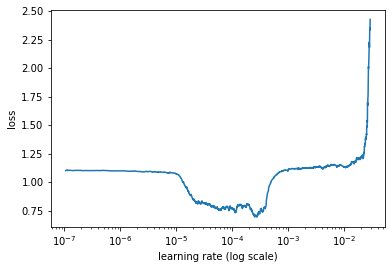

In [9]:
learner.lr_find(show_plot=True, max_epochs=3)

If you pick a bad learning rate below, learner will remember the bad training. I've purposely included the model = and learner = cells to reset you

In [25]:
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=evalr, batch_size=6)
learner.fit_onecycle(1e-4, 3)



begin training using onecycle policy with max lr of 0.0001...
Train for 1135 steps, validate for 71 steps
Epoch 1/3
1135/1135 [==============================] - 181s 159ms/step - loss: 0.8092 - accuracy: 0.5513 - val_loss: 0.7062 - val_accuracy: 0.6210
Epoch 2/3
1135/1135 [==============================] - 159s 140ms/step - loss: 0.5958 - accuracy: 0.7169 - val_loss: 0.5638 - val_accuracy: 0.7532
Epoch 3/3
1135/1135 [==============================] - 158s 139ms/step - loss: 0.3062 - accuracy: 0.8894 - val_loss: 0.4664 - val_accuracy: 0.8184


In [33]:
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=evalr, batch_size=6)
learner.fit_onecycle(1.2e-4, 5)



begin training using onecycle policy with max lr of 0.00012...
Train for 1135 steps, validate for 71 steps
Epoch 1/5
1135/1135 [==============================] - 183s 161ms/step - loss: 0.8110 - accuracy: 0.5574 - val_loss: 0.6995 - val_accuracy: 0.6232
Epoch 2/5
1135/1135 [==============================] - 158s 140ms/step - loss: 0.6197 - accuracy: 0.6855 - val_loss: 0.5355 - val_accuracy: 0.7889
Epoch 3/5
1135/1135 [==============================] - 158s 140ms/step - loss: 0.3896 - accuracy: 0.8490 - val_loss: 0.5486 - val_accuracy: 0.8158
Epoch 4/5
1135/1135 [==============================] - 159s 140ms/step - loss: 0.1814 - accuracy: 0.9423 - val_loss: 0.4791 - val_accuracy: 0.8321
Epoch 5/5
1135/1135 [==============================] - 159s 140ms/step - loss: 0.0817 - accuracy: 0.9766 - val_loss: 0.5729 - val_accuracy: 0.8369


In [26]:
learner.view_top_losses(n=1, preproc=t)

----------
id:1451 | loss:5.82 | true:neutral | pred:negative)



In [0]:
predictor = ktrain.get_predictor(learner.model, preproc=t)